# Applied Econometrics (Part 3)
## Lviv Data Science Summer School

### Jozef Barunik & Luboš Hanus

**July 2019**

Let's install required packages first:

In [34]:
options(repr.plot.width=8, repr.plot.height=4)

rm(list = ls())
library(data.table)
#library(devtools)
#install_github("wbnicholson/BigVAR/BigVAR")
#install_github("tomaskrehlik/frequencyConnectedness", tag = "0.1.6") 
library(frequencyConnectedness)
library(igraph,warn.conflicts=F)
library(MASS,warn.conflicts=F)
library(BigVAR)

In [35]:
getwd()

[1] "/Users/luboshanus/PHD/2019_Lviv"

# Application: Connectedness
We can further think how to use information in VAR. For example, if we want to measure how the system is connected, FEVDs can be used. 

FEVD gives information on how shocks transmit, how shock in variable $i$ spills over to variable $j$.

This is very useful, as it can be used as a system characterisation.
<br><br><br><br>

## how to measure connectedness of a system?
<br><br><br><br>
We will work with 11 most important banks data, returns and volatility (measure of risk, uncertainty).

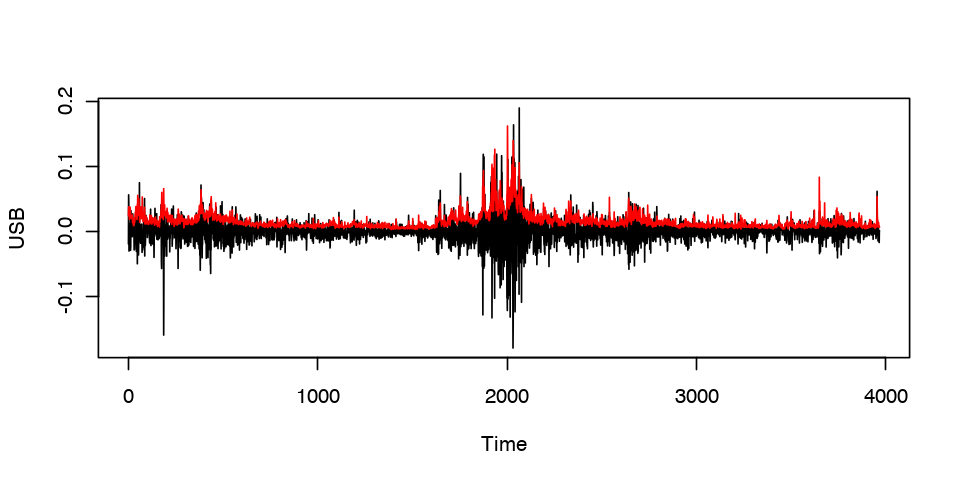

In [39]:
load(file="Example_banks.RData")
## Example of data
plot.ts(ret[,2])
lines(sqrt(rv[,2]),col="red")

Consider an $N$-dimensional vector $\mathbf{RV_t} = (RV_{1t},\ldots,RV_{nt})'$ holding $N$ assets that we model by VAR($p$) system as

$$\mathbf{RV_t} = \sum_{i=1}^p \mathbf{\Phi}_i \mathbf{RV}_{t-i}+ \boldsymbol{\epsilon}_t$$

with $\boldsymbol{\epsilon}_t\sim N(0,\mathbf{\Sigma}_{\epsilon})$. Moving average representation: 

$$\mathbf{RV}_t = \sum_{i=0}^{\infty}\mathbf{\Psi}_{i}\boldsymbol{\epsilon}_{t-i}.$$

These coefficients are extremely useful, since they show how shocks from variables transmit in the system, hence how the system is connected. The only problem is identification of shocks.

We can use Generalized FEVDs
$$\omega_{ij}^H=\frac{\sigma_{jj}^{-1}\sum_{h=0}^{H-1}\left( \mathbf{e}'_i \mathbf{\Psi}_h \mathbf{\Sigma}_{\epsilon}\mathbf{e}_j \right)^2}{\sum_{h=0}^{H-1}\left( \mathbf{e}'_i \mathbf{\Psi}_h \mathbf{\Sigma}_{\epsilon}\mathbf{\Psi}'_h\mathbf{e}_i \right)},$$

where $\mathbf{e}$ is a selection vector with one for $i$th element, zero otherwise. The sum of elements in rows is not equal to one, so we normalize it

$$ \widetilde{\omega}_{ij}^H = \frac{\omega_{ij}^H}{\sum_{j=1}^N \omega_{ij}^H}.$$

and finally obtain measure of connectedness $\mathcal{C} \in (0,100)$ 
$$\mathcal{C}^H=100\times \frac{1}{N} \sum_{\substack{i,j=1\\ i\ne j}}^N\widetilde{\omega}_{ij}^H.$$

Let's have a look at the connectedness table (elements of teh table are $\widetilde{\omega}_{ij}^{10}$)

In [40]:
RV <- log(sqrt(rv))
con <- spilloverDY12(VAR(RV, p = 4, type = "const"), n.ahead = 10, no.corr=F)
con

The spillover table has no frequency bands, standard Diebold & Yilmaz.


|    |   WFC|   USB|    MS|   JPM|    GS|     C|    BK|   BAC|   AXP|   PNC|   AIG|  FROM|
|:---|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|WFC | 21.61|  7.21|  6.70|  9.96|  6.91|  9.54|  6.01|  9.57|  8.35|  7.85|  6.30|  7.13|
|USB |  8.82| 20.00|  6.82| 11.04|  6.58|  8.59|  8.07|  6.84|  9.11|  8.39|  5.74|  7.27|
|MS  |  7.68|  6.01| 21.07| 10.58| 12.04|  9.30|  7.14|  8.45|  7.26|  5.44|  5.02|  7.18|
|JPM |  8.78|  8.01|  8.70| 20.76|  8.29| 10.21|  7.03|  8.24|  9.33|  5.76|  4.89|  7.20|
|GS  |  8.24|  6.09| 12.48| 10.96| 22.26|  8.47|  7.08|  7.50|  7.13|  5.95|  3.84|  7.07|
|C   |  9.29|  6.11|  8.12| 11.41|  6.75| 22.42|  5.05| 10.46|  8.04|  5.65|  6.71|  7.05|
|BK  |  7.41|  9.03|  8.58| 10.61|  8.38|  7.73| 21.11|  6.12|  8.11|  7.81|  5.10|  7.17|
|BAC | 10.12|  6.10|  8.18|  9.73|  6.86| 11.47|  5.30| 22.98|  6.97|  6.06|  6.24|  7.00|
|AXP |  8.54|  8.

Note FROM, and TO which are simple sums, and tell us *directional connectedness*

Total connectedness is

In [41]:
overall(con)

[[1]]
[1] 77.07261

## Dynamic connectedness

We can easily compute rolling window dynamics. 

NOTE: this takes time!

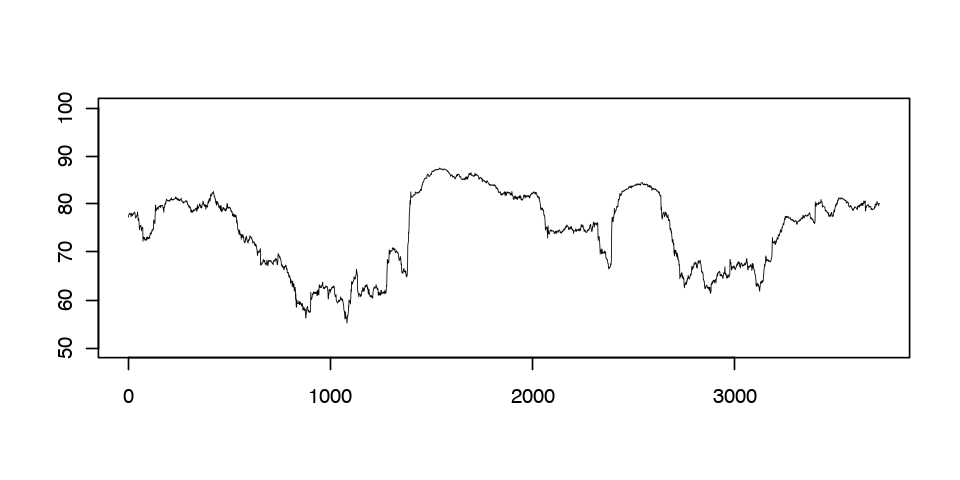

In [42]:
spills <- spilloverRollingDY12(data = RV, n.ahead = 10, no.corr = F, "VAR", 
                               params_est = list(p = 2, type = "const"), window = 250)
plot.ts(as.numeric(overall(spills)[[1]]), lwd = 0.5, ylim=c(50,100), xlab="", ylab="")

In [44]:
names(spills)

[1] "list_of_tables"

## Network representation

We can also note that VAR can be represented as a network

In [45]:
tab <- spilloverDY12(VAR(RV[1600:2000], p = 4, type = "const"), n.ahead = 10, no.corr=F)

In [46]:
tab$tables[[1]]

,WFC,USB,MS,JPM,GS,C,BK,BAC,AXP,PNC,AIG
WFC,0.12943277,0.09103750,0.06707068,0.10513113,0.07487153,0.11104515,0.06798585,0.10207090,0.09241533,0.08721282,0.07172635
USB,0.09121971,0.13877704,0.06784276,0.10000753,0.07730596,0.09318344,0.08446715,0.10466890,0.08986746,0.09079752,0.06186253
MS,0.06221198,0.07054663,0.14839527,0.08411946,0.11393137,0.09829557,0.07812947,0.08287048,0.08326158,0.07400270,0.10423549
JPM,0.09128580,0.08923313,0.07459815,0.12878998,0.08296692,0.11269848,0.07663042,0.10251359,0.09092088,0.08214916,0.06821349
GS,0.05723123,0.07218057,0.10762156,0.09007007,0.17148520,0.09548486,0.07694087,0.07884459,0.08833365,0.07677092,0.08503647
C,0.08056607,0.07303238,0.07651692,0.09438803,0.08635608,0.15926335,0.06298283,0.10889348,0.09052059,0.08470948,0.08277078
BK,0.07534996,0.09342563,0.07964503,0.09738213,0.08427488,0.09117302,0.14643761,0.08899630,0.08572746,0.08781311,0.06977487
BAC,0.08759691,0.08998472,0.06394408,0.09932666,0.06980082,0.12238368,0.06936312,0.13795989,0.09141674,0.09059500,0.07762838
AXP,0.08285782,0.07996129,0.08326430,0.09015720,0.09582381,0.09694804,0.07531977,0.08974975,0.15750536,0.08068290,0.06772977
PNC,0.08941084,0.09670694,0.07055003,0.09560650,0.07992775,0.10195215,0.08136760,0.10089323,0.09194881,0.12878797,0.06284819


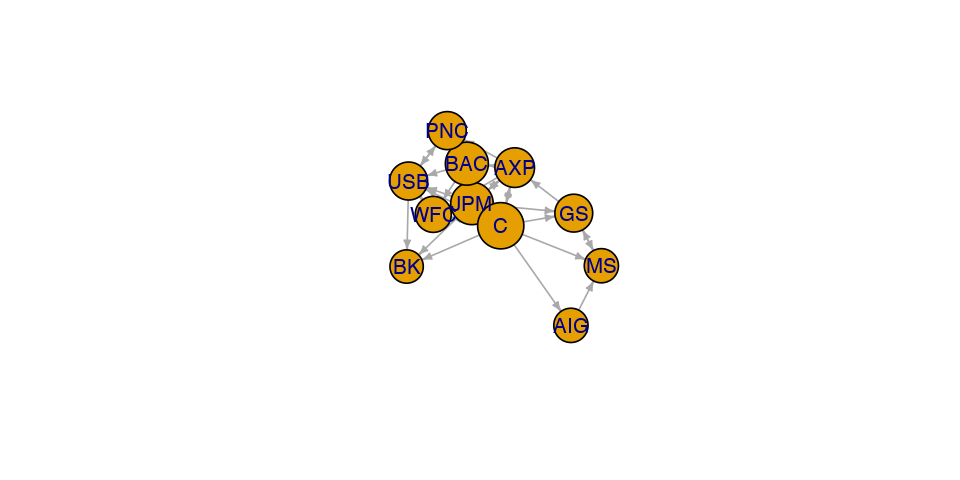

In [47]:
adj = t(100*tab$tables[[1]])
diag(adj) = 0  # 0 in an adjacency matrix means no edge is to be created
adj[adj<=9] = 0

netw = graph_from_adjacency_matrix(adj, mode = "directed", weighted = T)
plot(netw,
     layout = layout_with_fr,
     vertex.size = to(tab)[[1]]*5
)

## Machine learning connectedness
In case we like to compute connectedness of large system, we can use lasso again.

In [48]:
# Set very small lambda (gran parameter) to mimic no penalty
Model1 = constructModel(as.matrix(RV[1600:2000]), p = 4, struct = "Basic", gran=c(2), verbose = F, VARX = list(), ownlambdas = T)
Model1Results = cv.BigVAR(Model1)

In [49]:
# Model1

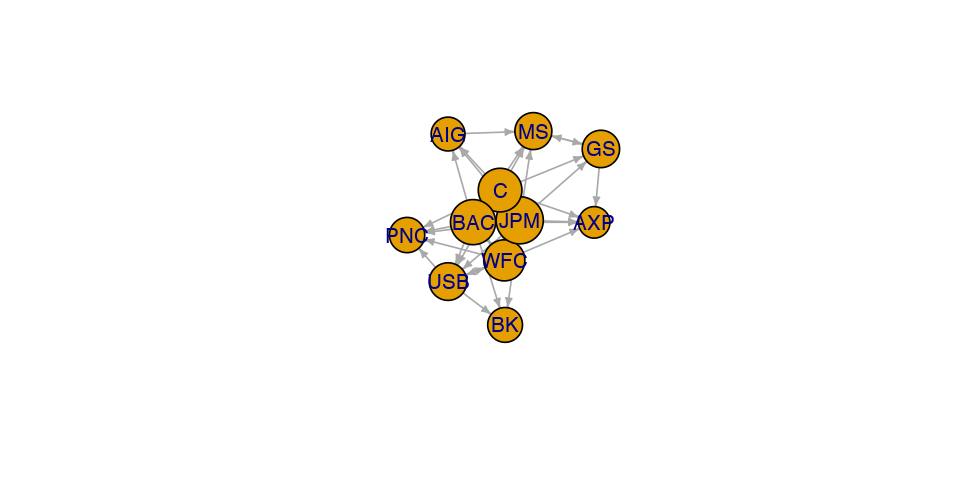

In [50]:
# spillover table from BigVaR
tabBig<-spilloverDY12(Model1Results, n.ahead = 10, no.corr = F)

adj=t(100*tabBig$tables[[1]])
diag(adj)=0  # 0 in an adjacency matrix means no edge is to be created
adj[adj<=9]=0

netw=graph_from_adjacency_matrix(adj,mode="directed",weighted=T)
plot(netw,
     layout=layout_with_fr,
     vertex.size=to(tabBig)[[1]]*5
)